In [ ]:
**Script to analyze [deconstructSigs](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-0893-4)**

deconstructSigs aims to determine the contribution of known mutational processes to a tumor sample. 
By using deconstructSigs, one can:

1. Determine the weights of each mutational signature contributing to an individual tumor sample

2. Plot the reconstructed mutational profile (using the calculated weights) and compare to the original input sample

In [ ]:
# 1. You need download these packages to run deconstructSigs
source("https://bioconductor.org/biocLite.R")
biocLite("deconstructSigs")
biocLite("BSgenome.Hsapiens.UCSC.hg19")
biocLite("GenomeInfoDb")

In [21]:
# 2. Once installed, the packages can be loaded.
library("deconstructSigs")
library("BSgenome.Hsapiens.UCSC.hg19")
library("GenomeInfoDb")

In [ ]:
The most basic initial input to the deconstructSigs package consists of a data frame containing
the mutational data for a tumor sample set. 
This structure must contain the genomic position and base change for each mutation,
as well as a sample identifier. The output of ANNOVAR is used for this analysis.

First column - Sample 
Second column - Chromosome
Third column - Start
Fourth column - Ref
fifth column - Alt

The file that use in this example you can download in [TNBC034.txt](https://github.com/Martinez-Gregorio-Hector/workflow_to_analysis_WES/tree/master/data/MutationalSignature)

In [24]:
# setwd("/data/Lab13/Hec_prov/") - Your working directory
# Upload your file eithe in CSV or TXT 
TNBC034 <- read.table("TNBC034.txt", sep = "\t", header = TRUE)
head(TNBC034)


Sample,Chr,Start,Ref,Alt
<fct>,<fct>,<int>,<fct>,<fct>
TNBC034,chr1,664652,G,A
TNBC034,chr1,1007432,GC,AT
TNBC034,chr1,2586413,C,A
TNBC034,chr1,9305084,C,T
TNBC034,chr1,12907350,CA,TG
TNBC034,chr1,12907379,TC,CA


In [ ]:
Using the function mut.to.sigs.input, the mutational data for a set of tumors is converted to an n-row and 96-columns data frame where n is the number of samples present. 
Each column respresents how frequently a mutation is found within each trinucleotide context.

**mut.to.sigs.input()**

In [25]:
# Convert to deconstructSigs input
sigs.input <- mut.to.sigs.input(mut.ref = TNBC034, 
                                sample.id = "Sample", 
                                chr = "Chr", 
                                pos = "Start", 
                                ref = "Ref", 
                                alt = "Alt")

In [ ]:
The output from mut.to.sigs.input can then be used as input to whichSignatures. Alternatively, a user can generate their own input data frame using calculated mutation information for each trinucleotide context per sample.

The function whichSignatures takes these two inputs (tumor.ref, signatures.ref) and uses an iterative approach to determine weights to assign to each signature in order to best recontruct the mutational profile of the input tumor sample.
An additional parameter to whichSignatures will dictate how any further normalization is done. This parameter, tri.counts.method, is originally set to 'default', which does not result in further normalization.

If tri.counts.method is set to 'exome', the input data frame is normalized by number of times each trinucleotide context is observed in the exome.

**whichSignatures()**


In [26]:
TNBC034 = whichSignatures(tumor.ref = sigs.input, 
                    signatures.ref = signatures.cosmic, 
                    sample.id = "TNBC034", 
                    contexts.needed = TRUE,
                    tri.counts.method = 'exome')

In [ ]:
The output from whichSignatures can be visualized using the function plotSignatures. This function takes the whichSignatures output (sigs.output)

**plotSignatures()**

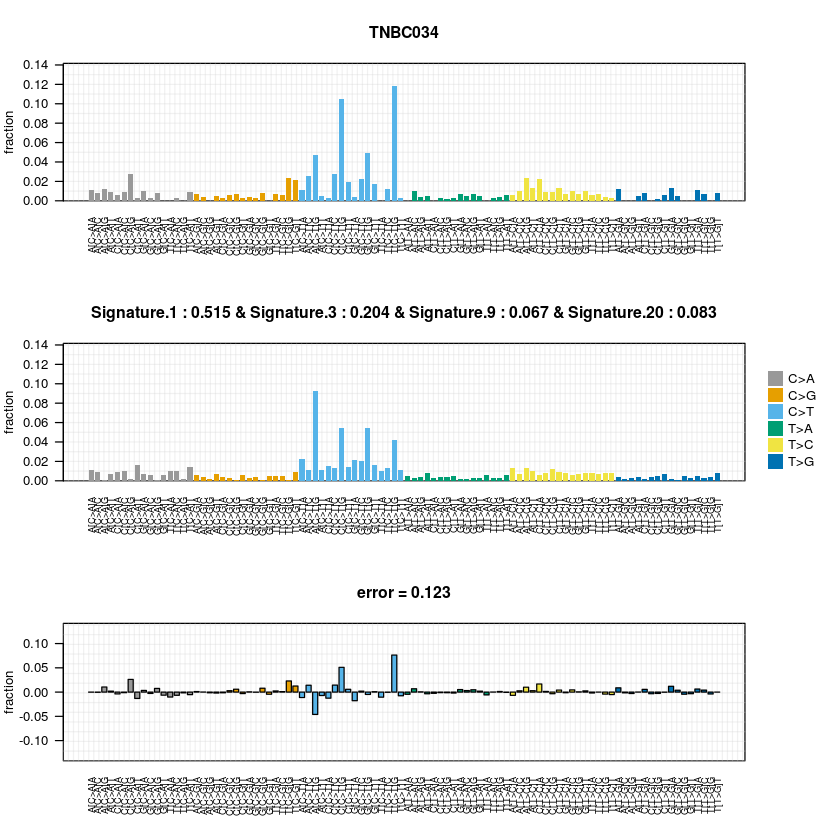

In [27]:
# Plot output
plotSignatures(TNBC034)

The output from whichSignatures can be visualized using the function makePie. This function takes the whichSignatures output (sigs.output)

**makePie()**

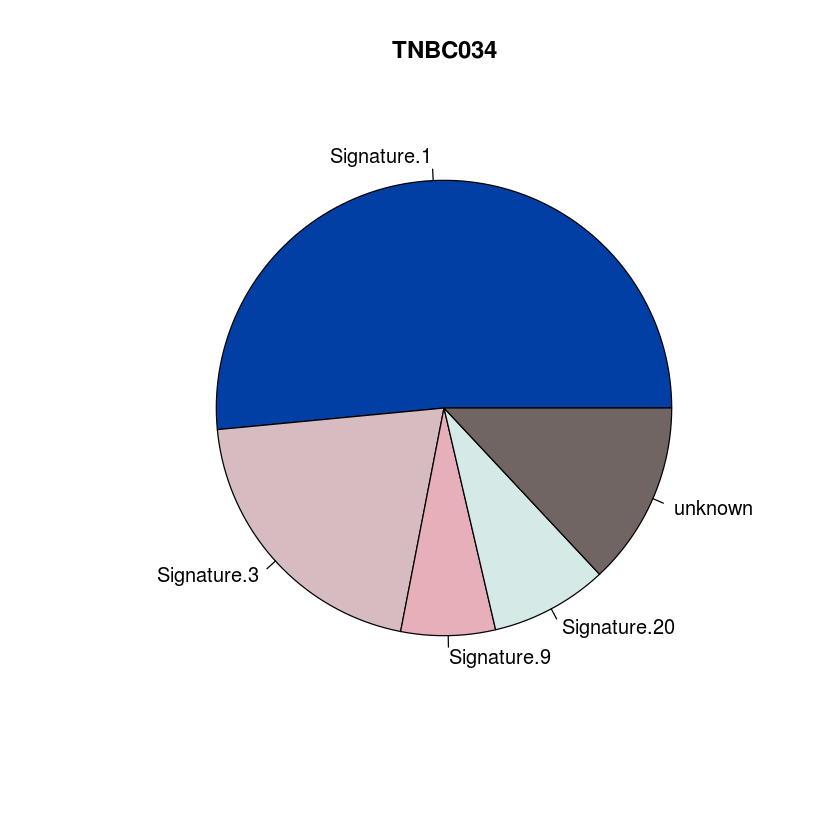

In [18]:
# Plot output
makePie(TNBC034)

In [28]:
# Your results also could be save eithe csv or txt 
write.csv(TNBC034, file = "TNBC034.MutationalSignature.csv")